## Dataset: https://www.kaggle.com/c/fake-news/data#

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np
import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_csv("fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df[df.isnull().any(axis="columns")]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
df.shape

(18285, 5)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
# Grab the independent features
X = df.drop(labels='label', axis=1)

In [13]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
# Grab the dependent features
y = df['label']

In [15]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
df['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [19]:
print(len(df))
print(len(X))

18285
18285


In [20]:
print(df.shape)
print(X.shape)

(18285, 5)
(18285, 4)


In [22]:
X['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

## Apply text preprocessing

In [23]:
P_stemmer = PorterStemmer()
corpus = []

for i in range(len(X)):
    review = re.sub(pattern="[^a-zA-Z]", repl=" ", string=X['title'][i])
    review = review.lower()
    review = review.split() # makes sentence into words or token
    review = [P_stemmer.stem(word=word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)
    

In [24]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [26]:
type(corpus)

list

In [27]:
## Applying Countervectorizer for creating the bag of words model

#### here max_features = 5500 means I just pick 5500 features because when we apply
#### CounterVectorizer then lots of features will be create. In these features I pick the most
#### important features

#### ngram_range=(1,3) means I count a word if that word is 1 to 3 times occurs in the sentences


count_vec = CountVectorizer(max_features=5500, ngram_range=(1,3))
X = count_vec.fit_transform(corpus).toarray()

In [28]:
X.shape

(18285, 5500)

In [29]:
# Split the data into train and text sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [30]:
count_vec.get_feature_names()[:20]

C:\Users\alami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [31]:
count_vec.get_feature_names_out()[:20] # Use this function

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [32]:
count_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(x_train, columns=count_vec.get_feature_names_out())

In [35]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
count_df.shape

(11885, 5500)

In [37]:
x_test.shape

(6400, 5500)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### This two link very useful to plot confusion metrix

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

## Apply MultinomialNB algorithm

In [39]:
classifier = MultinomialNB()

In [40]:
classifier.fit(X=x_train, y=y_train)

MultinomialNB()

In [41]:
pred = classifier.predict(X=x_test)

In [42]:
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Accuracy: 0.903
Confusion matrix, without normalization


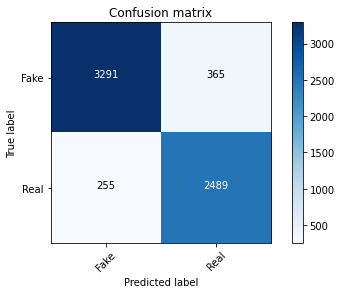

In [43]:
score = accuracy_score(y_true=y_test, y_pred=pred)
print("Accuracy: %0.3f" % score)
cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=["Fake", "Real"])

In [44]:
y_train.shape

(11885,)

### Passive Aggressive Classifier Algorithm

In [46]:
linear_classifier = PassiveAggressiveClassifier(max_iter=50)

Accuracy: 0.922
Confusion matrix, without normalization


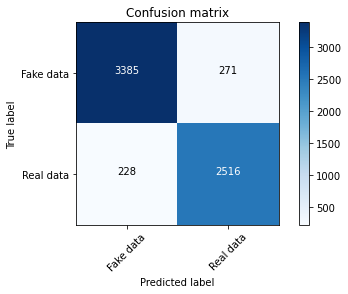

In [47]:
linear_classifier.fit(X=x_train, y=y_train)
pred2 = linear_classifier.predict(X=x_test)
score2 = accuracy_score(y_true=y_test, y_pred=pred2)
print("Accuracy: %0.3f" %score2)
cm2 = confusion_matrix(y_true=y_test, y_pred=pred2)
plot_confusion_matrix(cm=cm2, classes=["Fake data", "Real data"])

### Multinomial Classifier with Hyperparameter

In [48]:
previous_score = 0

for alpha in np.arange(0, 1, 0.1): # np.arange(start, stop, step)
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, Score: {}".format(alpha, score))

C:\Users\alami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score: 0.89015625
Alpha: 0.1, Score: 0.90359375
Alpha: 0.2, Score: 0.90375
Alpha: 0.30000000000000004, Score: 0.90453125
Alpha: 0.4, Score: 0.90453125
Alpha: 0.5, Score: 0.90453125
Alpha: 0.6000000000000001, Score: 0.904375
Alpha: 0.7000000000000001, Score: 0.90390625
Alpha: 0.8, Score: 0.90375
Alpha: 0.9, Score: 0.9040625


In [49]:
# Get features names
features_name = count_vec.get_feature_names_out()

In [50]:
classifier.coef_[0]

C:\Users\alami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.32812341,  -8.75757855,  -9.32812341, ..., -10.79446048,
        -8.6222372 ,  -9.62438922])

In [51]:
# Most real
sorted(zip(classifier.coef_[0], features_name), reverse=True)[:20]

C:\Users\alami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.02099878522723, 'trump'),
 (-4.357776062650015, 'hillari'),
 (-4.403288103339644, 'clinton'),
 (-4.878258413818559, 'elect'),
 (-5.208877790922519, 'new'),
 (-5.3050637188175935, 'video'),
 (-5.318927157119703, 'comment'),
 (-5.361709346734424, 'us'),
 (-5.458526246306651, 'fbi'),
 (-5.485642875244091, 'hillari clinton'),
 (-5.49669881981168, 'war'),
 (-5.571705130100378, 'vote'),
 (-5.571705130100378, 'email'),
 (-5.589843475018384, 'obama'),
 (-5.60831690676983, 'world'),
 (-5.792006708071041, 'russia'),
 (-5.830063050823026, 'donald'),
 (-5.861586543636636, 'america'),
 (-5.8696251721330714, 'donald trump'),
 (-5.877728944196178, 'day')]

In [53]:
# Most fake
sorted(zip(classifier.coef_[0], features_name))[:100]

[(-10.794460476425995, 'abroad'),
 (-10.794460476425995, 'abus new'),
 (-10.794460476425995, 'abus new york'),
 (-10.794460476425995, 'accid'),
 (-10.794460476425995, 'acosta'),
 (-10.794460476425995, 'act new'),
 (-10.794460476425995, 'act new york'),
 (-10.794460476425995, 'advic'),
 (-10.794460476425995, 'advis new'),
 (-10.794460476425995, 'advis new york'),
 (-10.794460476425995, 'afford care'),
 (-10.794460476425995, 'afford care act'),
 (-10.794460476425995, 'age new'),
 (-10.794460476425995, 'age new york'),
 (-10.794460476425995, 'agenda breitbart'),
 (-10.794460476425995, 'ahca'),
 (-10.794460476425995, 'airbag'),
 (-10.794460476425995, 'airlin'),
 (-10.794460476425995, 'aleppo new'),
 (-10.794460476425995, 'aleppo new york'),
 (-10.794460476425995, 'ali'),
 (-10.794460476425995, 'allegedli'),
 (-10.794460476425995, 'america breitbart'),
 (-10.794460476425995, 'america new'),
 (-10.794460476425995, 'america new york'),
 (-10.794460476425995, 'american breitbart'),
 (-10.79446